![alt text](https://camo.githubusercontent.com/213999fa2ac3c88e78097000fe4f6d254bb77b04/687474703a2f2f69766d2e76752e6e6c2f656e2f496d616765732f49564d5f6c6f676f5f726762325f74636d3233342d3835313539342e737667)

# Climate Hydrological Processes - Daisy World Practicum
##### Google Colobatory by Sem Vijverberg and Max van Gerrevink
---

Names students: " Double click on this cell to inset your names and student number" Format this as following: Name 1 (studentnumber), Name 2 (studentnumber) ect.


The goal of this project to gain understanding in how a simulation works and to start getting
familiar with programming. The Daisyworld model was used by Watson and Lovelock to
exemplify how the biosphere could foster ‘homeostasis’ (or equilibrium) within the Earth’s
climate following the Gaia hypothesis. While we are not interested in the original idea in the
Gaya hypothesis, suggesting that the biosphere behaves like a single super-organism aiming
-intentionally- at obtaining a self- regulatory effect on the Earth’s environment. We
recognize that the Daisyworld model is a nice example illustrating the potential role of the
biosphere in controlling/modifying local and global climate.
With the following equation you can write a code which is able to find the equilibrium
temperature of the hypothetical planet exposed to a certain amount of solar radiation. The
equilibrium temperature will depend and the planets albedo, which will change due to the
birth and death of black and/or white daisies.

**Goal:** Find the equilibrium temperature as function of the incoming solar insolation

**Hand in:** This Notebook will be your hand-in document, including the code to reproduce results and the answers to the questions. (***one hand in for each team***).

---

## Daisy world Equations

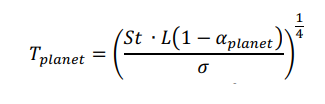

Where, L [-] is luminosity, St is the solar constant [W/m2], sigma is Stefan-Boltzmann constant
(5.67 * 10 ^-8 W/m2 /K4). alpha planet is the albedo of the Daisy World, defined as,

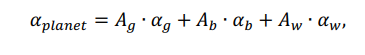

where, area and alpha stand for the area in [m2] and the albedo [-]. The subscripts (g, b and w)
denote (barren) ground, black daisies and white daisies, respectively. The area barren
ground (alpha g) is defined as,

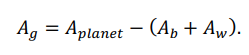

For simplification, the total area of the planet (alpha planet) is set to 1 m2, such that the 3 types of area’s (barren, white daisies, black daisies), also match the ratio of the planet. For example, if Aw = 0.25, then 0.25 m2 (and 25%) of the planet is covered with white daisies. The change in area of daisies is determined by the birth and death-rate, where we keep the death rate constant. The birthrate is depended on the local temperature, 

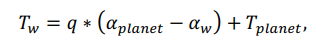

where, Tw [K] is the white daisy local temperature, q [K] is the horizontal insulation, which is a measure of the heat advected across the white daisy area. 

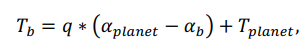

where, Tb [K] is the black daisy local temperature. As said, the birth rate of daisies depends on the state variable (i.e. non-constant variables) temperature,

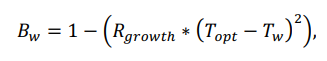

where, Bw is the birth rate in [m2/t], Rgrowth [m2/T/t] is the growth rate parameter, Topt
[K] is the optimal growing temperature of the daisies. This birth rate is plugged into the
equation for the change in area of white/black daisies [m2/t], below given for the white
daisies.

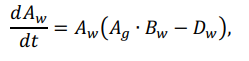

where, Dw is the death rate [t]. The change in are is simply given by the simple forward
Euler integration, i.e. yt +1 = yt + (df/dt)*dt. In our equation, setting the time step (dt) at 1 is
sufficient to get stable results. Thus, the area after one time step is given by,

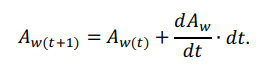

We now have all the formulae’s to perform the simulation. If the updated area (Aw (t+1)) is
different from Aw (t), it will alter the albedo of the planet (alpha planet) and will lead to a different
temperature (T planet).

## Code reproducability
To answer the following questions, I want you to have a code which is **reproducible**. I should be able to open your notebooks and generate all output that is needed to answer the
questions listed below. We will change some parameter settings, and re-run the code. In order to re-use the code, we will create functions.

For the Practicum, you need to be farmiliar with Python, lists, for loops, while loops, and functions (arguments and optional arguments).
If you are not fully familiar with these aspects, please go to  
https://github.com/VU-IVM/Learning_Python and go through the  notebooks. Download the repository, put them into your Google Drive, and you can run the relevant notebooks (that start with 0_0, 0_1, 0_2, 0_3) via Google Colab.

## Your Daisy World Code
Write a function _DW_simulation()_ to calculate the evolution of black and white daisies and the corresponding temperature. After the daisies are in equilibrium with the fixed incoming solar insolation, we want to stop the integration. The equilibrium is reached when the temperature (or the daisy coverage) no longer changes. We can code this e.g. like abs(DW_temperature - DW_next_temp) < 1E-6. Saying the temperature difference between the next timestep and the current timestep is less then 1E-6 K. 



At each timestep, the temperature, WD_area, and BD_area and no_daisy_temp, should be stored in lists. The function should output the following lists:
temperature_list, WD_area_list, BD_area_list, no_daisy_temp = DW_simulation(L).

The only non-default argument of this function will be L, all other parameters will become optional arguments which have default values.These values can be found in the table **default_parameters** in the Word doc or .png. When this function is working, we can easily adapt one of the parameters (and keep all the others default) for a certain question. This way, you should be able to generate output for each question without have a very long script where the code is copied again and again.

_Importing libraries_

In [ ]:
#First you have to import python libaries, which help you with proccessing data
import matplotlib.pyplot as plt #provides settings to plot data
import numpy as np #mathematical operations on arrays
import sys #module provides information about constants, functions and methods of the Python interpreter

_Initialize model and set parameters_

Note, this is to get you started to create the function _DW_simulation(), once you have declared all optional arguments in the function _DW_simulation()_, you can remove these parameter declarations.

Set daisy parameters


In [ ]:
growth_rate_temp = 0.003265 # [m2/T/t]
hor_ins = 20 # [K]
deathrate = 0.2 # Both for the white and black Daisies [t]
WD_albedo = 0.75 # White Daisies albedo [-]
BD_albedo = 0.25 # Black Daisies albedo [=]
opt_temp_W = 22.5 # optimal temperature for White daisies [C]
opt_temp_W += 273.15 # Convert to Kelvin [K]
opt_temp_B = 10.5 # optimal temperature for Black daisies [C]
opt_temp_B += 273.15 # Convert to Kelvin [K]

Initializing start values of daisies

In [ ]:
WD_area = 0.01 # White Daisies area [m2]
BD_area = 0.01 # Black Daisies area [m2]

Intitalizing lists to store intermediate/output

In [ ]:
eq_temperature = []
eq_area_WD = []
eq_area_BD = []
temp_log_no_daisy = []

Set global constants

In [ ]:
solar_constant = 1000 # [W/m2]
barren_albedo = 0.5 # [-]
Stefan_Boltzmann = 5.67e-08 # [W/m2/k4]
dt = 1. # intergration 'time' stepsize

In [ ]:
# create DW_simulation() here
def DW_simulation(L, WD_area=0.01, BD_area=0.01, growth_rate_temp=0.003265, deathrate=0.2,
                  opt_temp_W=295.65, opt_temp_B=295.65, WD_albedo=0.75, BD_albedo=0.25,
                  barren_albedo=0.5, solar_constant=1000, hor_ins=20, Stefan_Boltzmann=5.67e-08,
                  dt=1.):
               
    # Create lists to store different equilibrium values for WD_area, BD_area and temperature.
    WD_area_list     = []
    BD_area_list     = []
    temperature_list = []
    
    Convergence = False
    n = 0
    while Convergence == False:
        n += 1
        # =====================================================================
        # Solve equations for single L
        # =====================================================================

        # 1 find planetary albedo
        fertile_area = 1-(WD_area + BD_area)
        DW_albedo = (barren_albedo * fertile_area) + (WD_albedo * WD_area) + (BD_albedo * BD_area)

        # 2 find planetary temperature
        DW_temperature = ((solar_constant * L * (1-DW_albedo)) / (Stefan_Boltzmann))**0.25

        # 3 find local temperature of daisies
        # converted to C since the equationg only works with celsius:
        WD_localtemp = (hor_ins*(DW_albedo-WD_albedo) + (DW_temperature)) 
        BD_localtemp = (hor_ins*(DW_albedo-BD_albedo) + (DW_temperature)) 

        # 4 find birthrate for daisy
        #prevent negative birthrate with standard python function max(a,b) 
        dWD_birth = max(0,1-growth_rate_temp*(opt_temp_W - WD_localtemp)**2) * dt
        dBD_birth = max(0,1-growth_rate_temp*(opt_temp_B - BD_localtemp)**2) * dt

        # 5 calulate change in daisy areas due to birth and death
        dWD_area = WD_area * (fertile_area * dWD_birth - deathrate)
        dBD_area = BD_area * (fertile_area * dBD_birth - deathrate)

        # 6 update area's
        #using forward Euler method to approximate differential equation for incease in area over time:
        WD_area += dWD_area * dt
        BD_area += dBD_area * dt
        # ensure that daisys area is >= 0.01, since too lower values will mean
        # no seeds are available on the planet for growing 
        WD_area = max(0.01, WD_area)
        BD_area = max(0.01, BD_area)

        # 7 calculate new albedo
        fertile_area = 1-(WD_area + BD_area)
        DW_albedo = (barren_albedo * fertile_area) + (WD_albedo * WD_area) + (BD_albedo * BD_area)

        # 8 calulate new temperature 
        DW_temp_next = ((solar_constant * L * (1-DW_albedo)) / (Stefan_Boltzmann))**0.25

        # 9 check for convergence of Daisy World temperature 
        Convergence = abs(DW_temperature - DW_temp_next)<1E-6

        # 10 temperature without daisies
        no_daisy_temp = ((solar_constant * L * (1-0.5)) / (Stefan_Boltzmann))**0.25

        if n > 2000:
            Convergence = True
            print('reached max convergence iterations')
        WD_area_list.append(WD_area)
        BD_area_list.append(BD_area)
        temperature_list.append(DW_temp_next)
        
    return temperature_list, WD_area_list, BD_area_list, no_daisy_temp



In [ ]:
# _daisy_world()_ function, see question 2
def daisy_world(luminosity_range, WD_area=0.01, BD_area=0.01, opt_temp_W=295.65, 
                opt_temp_B=295.65, WD_albedo=0.75, BD_albedo=0.25, ):
    # intitalizing lists to store intermediate/output
    eq_temperature = []
    eq_area_WD = []
    eq_area_BD = []
    temp_log_no_daisy = []

    for L in luminosity_range:  
        # ======================================================================
        # Solve equations for single L
        # ======================================================================
        out = DW_simulation(L, 
                            WD_area=WD_area, 
                            BD_area=BD_area,
                            WD_albedo=WD_albedo,
                            BD_albedo=BD_albedo,
                            opt_temp_B=opt_temp_B,
                            opt_temp_W=opt_temp_W)
        temperature_list, WD_area_list, BD_area_list, no_daisy_temp = out
        # ======================================================================
        # save the equilibrium variables for each L
        # ======================================================================
        DW_temp_eq = temperature_list[-1]
        WD_area = WD_area_list[-1]
        BD_area = BD_area_list[-1]
        eq_temperature.append(DW_temp_eq)
        eq_area_WD.append(WD_area)
        eq_area_BD.append(BD_area)
        temp_log_no_daisy.append(no_daisy_temp)
        
    return eq_temperature, eq_area_WD, eq_area_BD, temp_log_no_daisy

### Your plotting functions

In [ ]:
def plot_DW_vs_time(temperature_list, WD_area_list, BD_area_list):
    fig, ax = plt.subplots(1,2, figsize=(15,5))
    ax[0].plot(WD_area_list, label='White daisies')
    ax[0].plot(BD_area_list, label='Black daisies')
    ax[0].set_xlabel('timesteps')
    ax[0].set_ylabel('Fraction of coverage')
    ax[0].set_title("Evolution of black and white daisies")
    ax[0].legend()
    ax[1].plot(temperature_list, label='Temperature')
    ax[1].set_xlabel('timesteps')
    ax[1].set_ylabel('Temperature (K)')
    ax[1].set_title("Evolution of temperature (K)")
    ax[1].legend()
    plt.show()

In [ ]:
# your plot_DW_vs_lum()
def plot_DW_vs_lum(luminosity_range, eq_temperature, temp_log_no_daisy, eq_area_WD, eq_area_BD):
    fig, ax = plt.subplots(1,2, figsize=(15,5))
    ax[1].plot(luminosity_range, eq_temperature, label='Eq. Temp with daisies')
    ax[1].plot(luminosity_range, temp_log_no_daisy, label='Temperature no daisies')
    ax[1].set_xlabel('Luminosity')
    ax[1].set_ylabel('Temperature (K)')
    ax[1].set_title("Equilibrium temperature (K) versus Luminosity")
    ax[1].legend()
    ax[0].plot(luminosity_range, eq_area_WD, label='Eq. white daisies')
    ax[0].plot(luminosity_range, eq_area_BD, label='Eq. black daisies')
    ax[0].set_xlabel('Luminosity')
    ax[0].set_ylabel('Fraction of coverage')
    ax[0].set_title("Equilibrium coverage of the daisies versus Luminosity")
    ax[0].legend()
    plt.show()

# Daisy World questions


## Evolution of black and white daisies

**Task:** Create the _DW_simulation_(L) function with all its default parameters. Please read the text below the header _Your Daisy World Code_.

**Task:** Plot the evolution of the two daisies in a single supplot and plot the corresponding evolution of temperature in another supplot. I already created this plotting function called _DW_vs_time()_.    

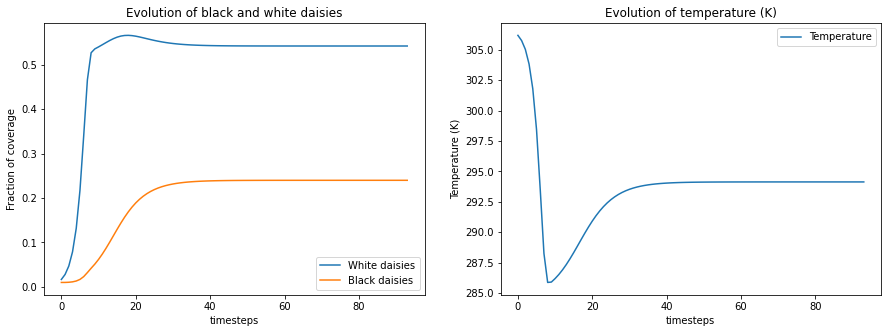

In [ ]:
# call function
temperature_list, WD_area_list, BD_area_list, no_daisy_temp = DW_simulation(L=1)
# call plotting function
plot_DW_vs_time(temperature_list, WD_area_list, BD_area_list)

**Question**: The evolution of black and white daisies as function of time is shown in the figure, decribe what is happening.

_Answer_:

As the daisy world evolves over time, the daisies will adapt to the daisy world temperature, which depends on the amount of incoming solar energy. The change in daisy coverage, in turn, adjusts the temperature of the world, which will again lead to an adjustment in the daisy coverage. White daisies grow better at warmer temperature. We observe a rapid increase in white daisies, which increase the albedo. This decreases the temperature. Black daisy start to grow, after some steps the temperature starts to increase again. After approx. 30 timesteps, the growing and dying of black & white daisies occurs at the same rate. The world has reached an equilibrium temperature.  

## Find equilibrium temperature as function of solar insolation

Create numpy array for luminosity. The numpy array 'luminosity_range' will point to the list of Luminisity values (L) we will use, i.e. ranging from 0.5 to 1.7 with intervals of 0.002.

**Task:** Create function _daisy_world_() below the _DW_simulation_ function. The daisy world function should run _DW_simulation_ for different L values and store the equilibrium temperature in lists called: 

eq_temperature, eq_area_WD, eq_area_BD, temp_log_no_daisy

**Task:** Create a plotting function and place in under the header _Your Plotting functions_ to show the DW equilibium as function of luminosity. Plot the equilibium daisy coverage (left subplot) and DW equilibium temperature (right subplot)

In [ ]:
# create a sequence of numbers (i.e. an array) using the numpy python library
luminosity_range = np.arange(0.5, 1.8, 0.002) # [-]
#luminosity_range = luminosity_range[::-1] <-- to reverse the array, needed for future questions on hysteresis

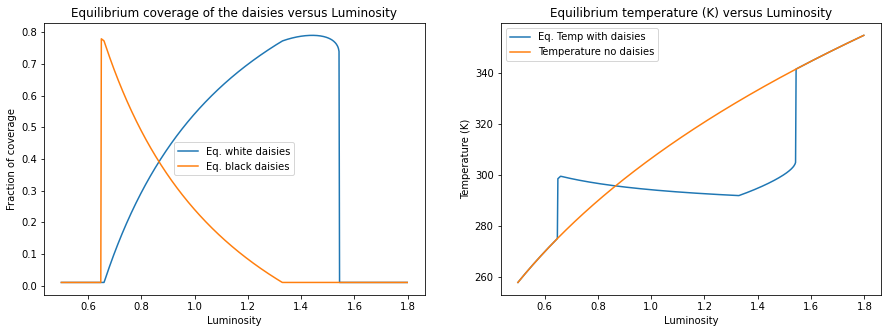

In [ ]:
# call function
out = daisy_world(luminosity_range)
eq_temperature, eq_area_WD, eq_area_BD, temp_log_no_daisy = out

# plotting
DW_vs_lum(luminosity_range, eq_temperature, temp_log_no_daisy, eq_area_WD, eq_area_BD)

**Question:** Briefly describe what you see in the figure.

_Answer:_

## Experiments
When you have your code finished, perform the following experiments. All variables should remain default, except for the variable you are changing.

### Changing albedo experiment

**Task:** Change WD_albedo to 0.8 and BD_albedo to 0.2.


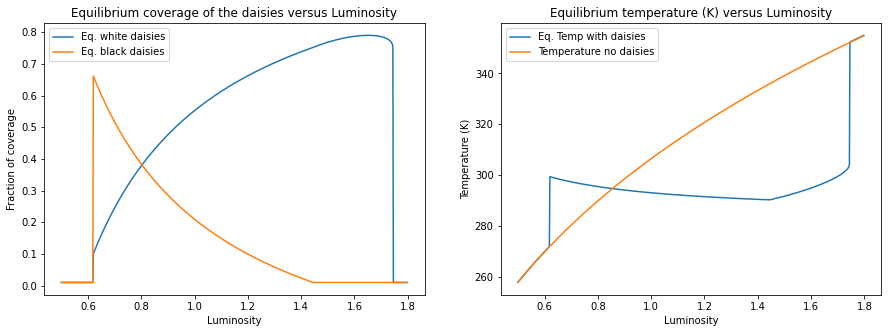

In [ ]:
kwrgs = {'WD_albedo': 0.8,
         'BD_albedo': 0.1}

# call function
out = daisy_world(luminosity_range, **kwrgs)
eq_temperature, eq_area_WD, eq_area_BD, temp_log_no_daisy = out

# plotting
DW_vs_lum(luminosity_range, eq_temperature, temp_log_no_daisy, eq_area_WD, eq_area_BD)


**Question:** Intepret what changed.

_Answer:_

### Changing optimal temperature black daisies experiment

**Task:** Change optimal temperature black daisies to 20 degrees Celsius (293.15 Kelvin).


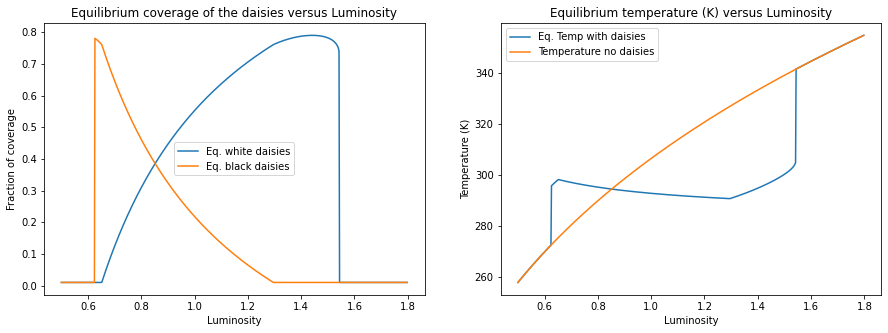

In [ ]:
opt_temp_B = 20
opt_temp_B += 273.15
kwrgs = {'opt_temp_B' : opt_temp_B}

# call function
out = daisy_world(luminosity_range, **kwrgs)
eq_temperature, eq_area_WD, eq_area_BD, temp_log_no_daisy = out

# plotting
DW_vs_lum(luminosity_range, eq_temperature, temp_log_no_daisy, eq_area_WD, eq_area_BD)


**Question:** Intepret what changed.

_Answer:_

### Show Hysteresis

**Task:** Show hysteresis. Test if order (low-to-high) or (high-to-low) of luminosity values matter for the evolution of the DW equilibrium temperature.


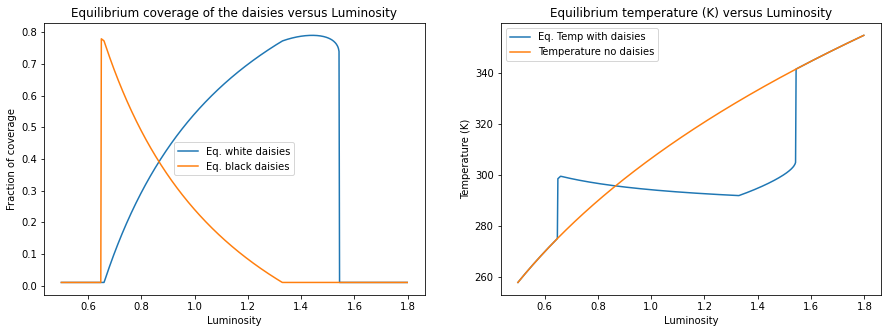

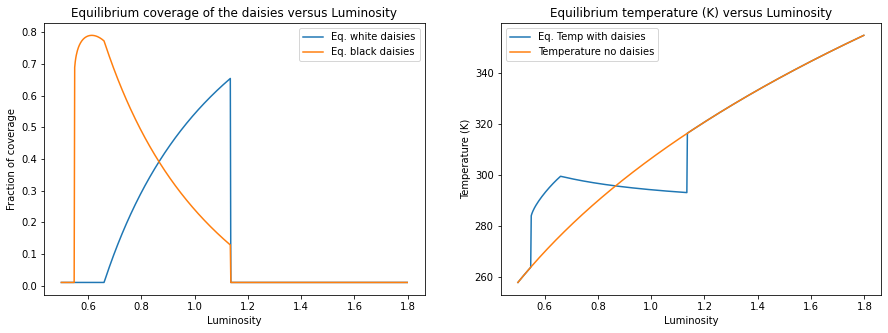

In [ ]:
# From low-to-high luminosity
out = daisy_world(luminosity_range) 
eq_temperature, eq_area_WD, eq_area_BD, temp_log_no_daisy = out
# plotting
DW_vs_lum(luminosity_range, eq_temperature, temp_log_no_daisy, eq_area_WD, eq_area_BD)

# From high-to-low luminosity
luminosity_range[::-1] # this is how you invert a list/nparray

# call function
out = daisy_world(luminosity_range[::-1]) 
eq_temperature, eq_area_WD, eq_area_BD, temp_log_no_daisy = out
# plotting
DW_vs_lum(luminosity_range[::-1], eq_temperature, temp_log_no_daisy, eq_area_WD, eq_area_BD)


**Question:** Explain why we observe hysteresis.

_Answer:_

## General questions

**Question:** What other processes could be implemented to make the model more realistic?


_Answer:_



**Question:** What are other physical/biosphysical real-world processes that can lead to significant
feedbacks at the local and global scale?


_Answer:_


**Question:** Can you think of other types of feedbacks leading to a stabilization of the Earth’s local or global climate (homeostasis)? 

_Answer:_